# General Overview - Data Storytelling

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

sns.set(style='darkgrid')
%matplotlib inline

In [10]:
data = pd.read_csv('diabetes_cleaned.csv', index_col=0) # import data

diabetes = data.copy() # save a copy of data as diabetes

In [13]:
diabetes.head(10)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,No,No,Up,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,No,No,Up,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,No,No,Steady,No,No,No,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
7,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,...,No,No,No,No,No,No,No,No,Yes,>30
8,48330783,Caucasian,Female,[80-90),2,1,4,13,68,2,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
9,63555939,Caucasian,Female,[90-100),3,3,4,12,33,3,...,No,No,No,Steady,No,No,No,Ch,Yes,NO


In [12]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67874 entries, 0 to 67873
Data columns (total 42 columns):
patient_nbr                 67874 non-null int64
race                        67874 non-null object
gender                      67874 non-null object
age                         67874 non-null object
admission_type_id           67874 non-null int64
discharge_disposition_id    67874 non-null int64
admission_source_id         67874 non-null int64
time_in_hospital            67874 non-null int64
num_lab_procedures          67874 non-null int64
num_procedures              67874 non-null int64
num_medications             67874 non-null int64
number_outpatient           67874 non-null int64
number_emergency            67874 non-null int64
number_inpatient            67874 non-null int64
diag_1                      67874 non-null object
diag_2                      67686 non-null object
diag_3                      66843 non-null object
number_diagnoses            67874 non-null int64
max

The target variable is the likelihood of readmission, or readmitted column.

## readmitted patients overall

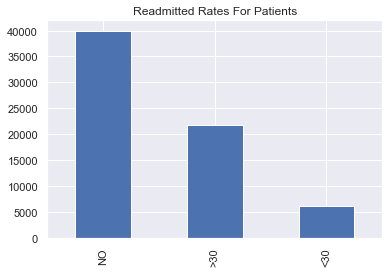

In [50]:
diabetes.readmitted.value_counts().plot(kind='bar')
plt.title('Readmitted Rates For Patients')
plt.show()

The majority of patients are not frequent visitors while the second majority are those who return after 30 days.

## patient race, gender, and age

In [65]:
# crosstab

def chart_display(x, y):
    return pd.crosstab(x, y, margins=True, margins_name='Total')

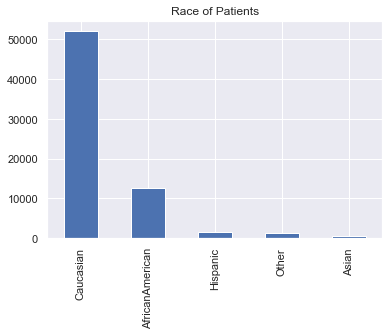

In [17]:
diabetes.race.value_counts(dropna=False).plot(kind='bar')
plt.title('Race of Patients')
plt.show()

In [30]:
pd.crosstab(diabetes.race, [diabetes.readmitted, diabetes.gender], margins=True, margins_name='Total')

readmitted         <30          >30           NO         Total
gender          Female  Male Female  Male Female   Male       
race                                                          
AfricanAmerican    676   416   2366  1498   4620   3018  12594
Asian               15    26     62    45    170    170    488
Caucasian         2494  2296   9026  8033  15352  14947  52148
Hispanic            59    60    227   185    518    446   1495
Other               39    40    165   146    375    384   1149
Total             3283  2838  11846  9907  21035  18965  67874

In [66]:
chart_display(diabetes.readmitted, diabetes.race)

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Total
readmitted,,,,,,
<30,1092,41,4790,119,79,6121
>30,3864,107,17059,412,311,21753
NO,7638,340,30299,964,759,40000
Total,12594,488,52148,1495,1149,67874


In [68]:
chart_display(diabetes.readmitted, diabetes.gender)

gender,Female,Male,Total
readmitted,,,
<30,3283,2838,6121
>30,11846,9907,21753
NO,21035,18965,40000
Total,36164,31710,67874


In [71]:
chart_display(diabetes.readmitted, diabetes.age)

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),Total
readmitted,,,,,,,,,,,
<30,3,26,81,186,489,859,1382,1776,1158,161,6121
>30,24,139,271,676,1908,3662,4847,5996,3765,465,21753
NO,125,359,732,1751,4218,7474,8984,9449,5834,1074,40000
Total,152,524,1084,2613,6615,11995,15213,17221,10757,1700,67874


In [73]:
chart_display([diabetes.readmitted, diabetes.gender], [diabetes.age])

age                [0-10)  [10-20)  [20-30)  [30-40)  [40-50)  [50-60)  \
readmitted gender                                                        
<30        Female       1       16       54       98      247      432   
           Male         2       10       27       88      242      427   
>30        Female      13       93      177      375      956     1879   
           Male        11       46       94      301      952     1783   
NO         Female      65      188      467     1043     2051     3529   
           Male        60      171      265      708     2167     3945   
Total                 152      524     1084     2613     6615    11995   

age                [60-70)  [70-80)  [80-90)  [90-100)  Total  
readmitted gender                                              
<30        Female      669      939      715       112   3283  
           Male        713      837      443        49   2838  
>30        Female     2445     3238     2328       342  11846  
           Male       2402     2758     1437       123   9907  
NO         Female     4326     5062     3546       758  21035  
           Male       4658     4387     2288       316  18965  
Total                15213    17221    10757      1700  67874

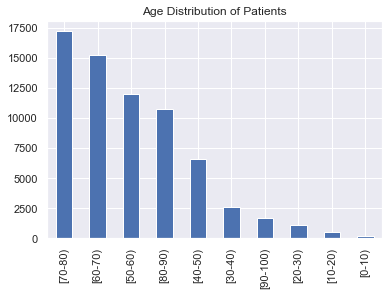

In [34]:
diabetes.age.value_counts().plot(kind='bar')
plt.title('Age Distribution of Patients')
plt.show()

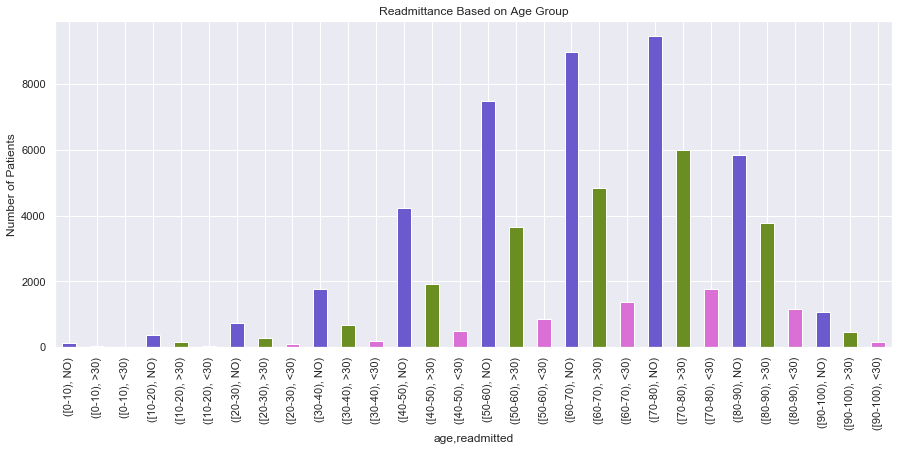

In [59]:
plt.figure(figsize=(15, 6))
diabetes.groupby('age')['readmitted'].value_counts().plot(kind='bar', color=['slateblue', 'olivedrab', 'orchid'])
plt.ylabel('Number of Patients')
plt.title('Readmittance Based on Age Group')
plt.show()

The majority of patients are older, in the 50-60, 60-70, and 70-80 range.

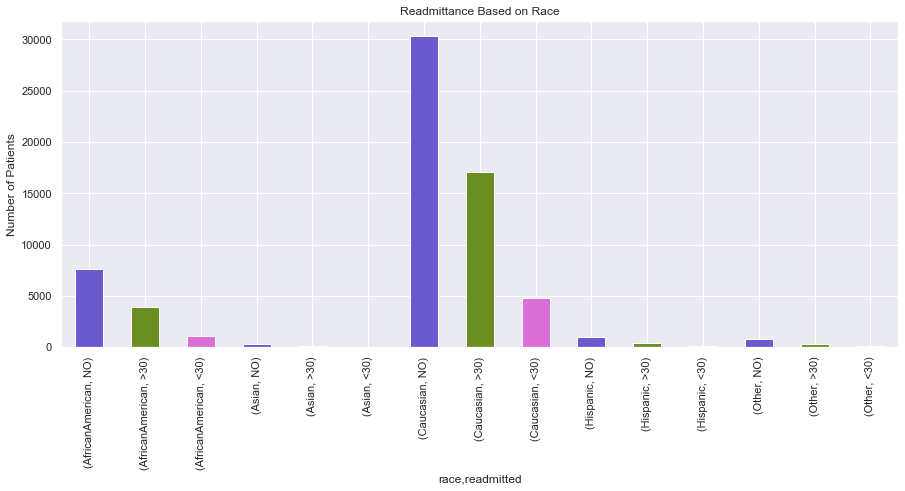

In [60]:
plt.figure(figsize=(15, 6))
diabetes.groupby('race')['readmitted'].value_counts().plot(kind='bar', color=['slateblue', 'olivedrab', 'orchid'])
plt.ylabel('Number of Patients')
plt.title('Readmittance Based on Race')
plt.show()

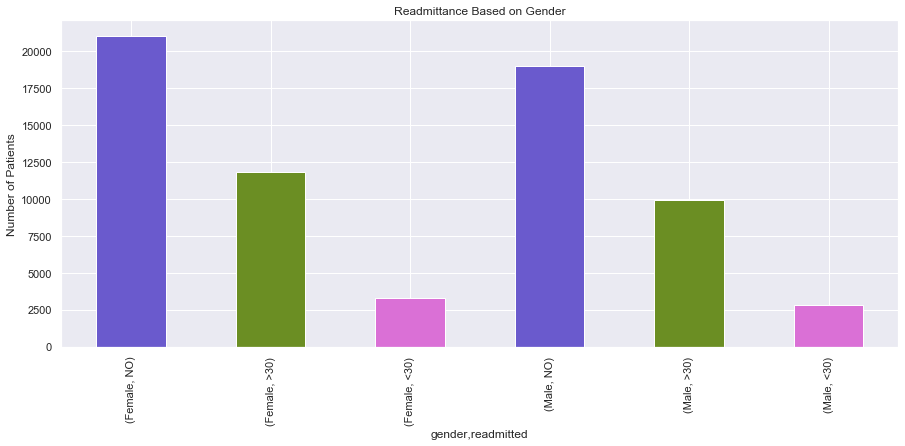

In [61]:
plt.figure(figsize=(15, 6))
diabetes.groupby('gender')['readmitted'].value_counts().plot(kind='bar', color=['slateblue', 'olivedrab', 'orchid'])
plt.ylabel('Number of Patients')
plt.title('Readmittance Based on Gender')
plt.show()

## hospital stay, tests, and outcomes

In [ ]:
time_in_hospital            67874 non-null int64
num_lab_procedures          67874 non-null int64
num_procedures              67874 non-null int64
num_medications             67874 non-null int64
number_outpatient           67874 non-null int64
number_emergency            67874 non-null int64
number_inpatient            67874 non-null int64